Following tutorial at
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [9]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import csv

# PCA analysis

In [30]:

items = ["carrot", "democracy"]
tokens = []
with open('data/derived/bnc_words_with_context_tokens_and_vectors.csv', mode="r") as infile:
    # word sentence concreteness vector
    reader = csv.reader(infile, delimiter="\t")
    for row in reader:
        word = row[0]
        if word.lower() in items:
            tokens.append(row)
print("number of data points: %s" % len(tokens))              
                
data = pd.DataFrame.from_records(tokens, columns=["word", "text", "concreteness", "vector"])
data["vector"] = data["vector"].apply(lambda x: np.fromstring(x[1:-1], dtype=np.float, sep=' '))

print(data)

print('Size of the dataframe: {}'.format(df.shape))

number of data points: 63
         word                                               text concreteness  \
0   democracy         Jailed since 1981 for advocating democracy         1.78   
1   democracy  In April 1981 he was again arrested for articl...         1.78   
2   democracy  He says of the liberals that they were placed ...         1.78   
3   democracy  The suggestion that democracy can not be impos...         1.78   
4   democracy  This is an author who has contributed to the R...         1.78   
..        ...                                                ...          ...   
58  democracy  Within months of the signing ceremony , China ...         1.78   
59  democracy  DEPENDING on who you talk to , Martin Lee is t...         1.78   
60  democracy  If Hong Kong does espouse democracy , Martin L...         1.78   
61     carrot  They are freshly prepared from organic fruit a...          5.0   
62     carrot  One carrot resembled a tower in Gaudi 's cathe...          5.0   

 

In [72]:

X = data['vector']
X = X.to_list()
y = data['word']
contexts = data['text']

feat_cols = [ 'dimension'+str(i) for i in range(len(X[0])) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
df['context'] = contexts

X, y = None, None 

print('Size of the dataframe: {}'.format(df.shape))

    
# vectors = df.get("vector")
# x = vectors.to_numpy()
# x = x.tolist()
# all_vectors = all_vectors + x
# # TSNE analysis

# model = TSNE(n_components=2, random_state=0)
# res = model.fit_transform(all_vectors)
# return res

Size of the dataframe: (63, 771)


In [73]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.38627157 0.06366905 0.04251864]


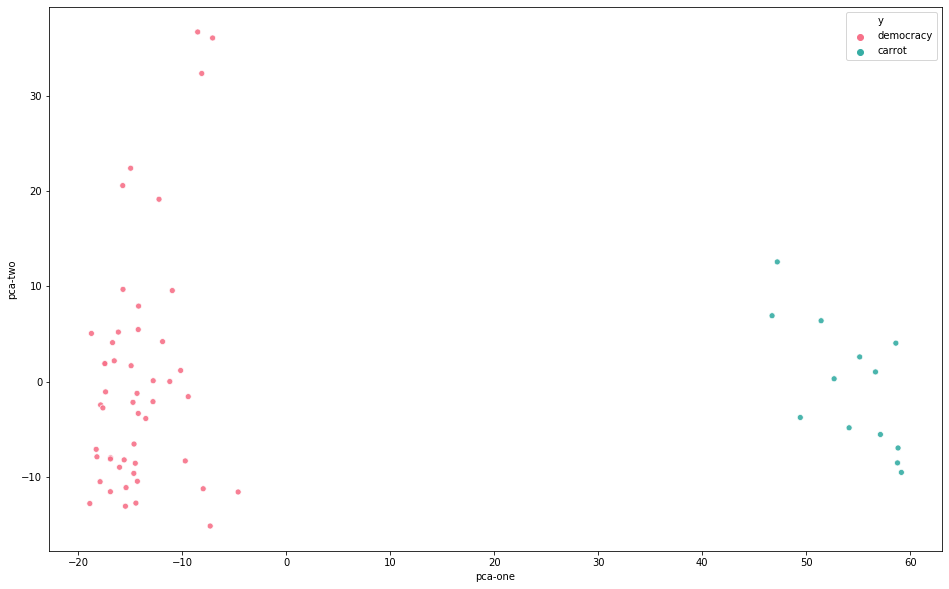

In [74]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("husl", 2),
    data=df,
    legend="full",
    alpha=0.9
)

for line in range(0,df.shape[0]):
     p1.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

Tokens
0:	 Jailed since 1981 for advocating democracy
1:	 In April 1981 he was again arrested for articles he had written in association with democracy activist Xu Wenli , tried in May 1982 and sent to prison .
2:	 He says of the liberals that they were placed in a predicament by the fall : ‘ A democracy can not be imposed by force , the majority must favour it , yet the majority wanted what Khomeini wanted — an Islamic republic . ’
3:	 The suggestion that democracy can not be imposed by force has the force of a generalisation .
4:	 This is an author who has contributed to the Russia which has come after him — to the emergence there , at the present time , of the demand for a lawful Opposition , for the duality of democracy .
5:	 In both cases , democracy is invoked .
6:	 But it is the theory of democracy as the right of the majority to rule which is seen as central , rather than democracy as the preservation of minority rights .
7:	 But it is the theory of democracy as the right of th

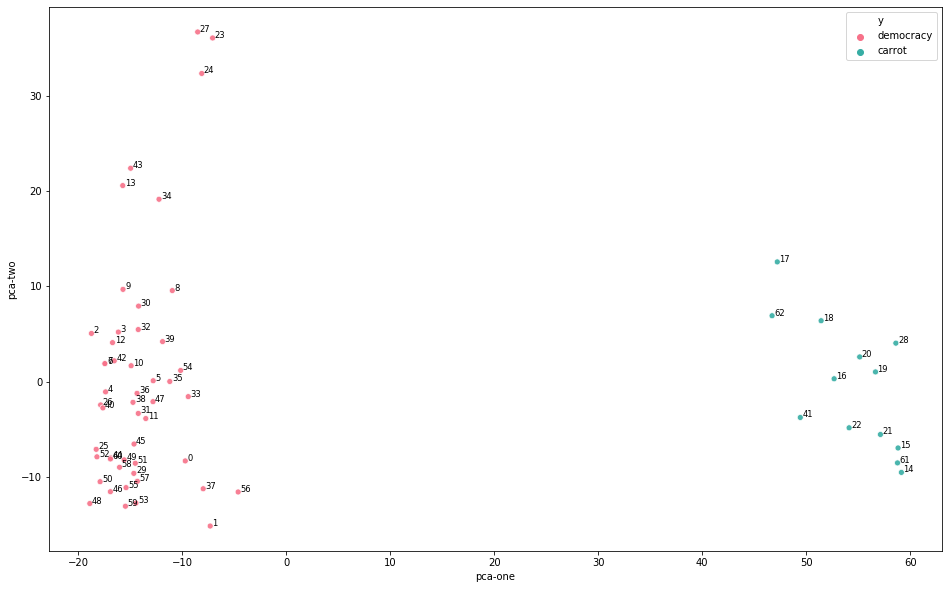

In [146]:
# attempt to get annotations in 2d pca
import textwrap

plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("husl", 2),
    data=df,
    legend="full",
    alpha=0.9
)

# for line in range(0,df.shape[0]):
#     if line % 5 == 0:
#         text = df.context[line]
#         text = textwrap.wrap(text, width=40)
#         text = '\n'.join(text)
#         p1.text(df["pca-one"][line]+0.2, df["pca-two"][line], text, horizontalalignment='left', size='medium', color='black', weight='semibold')
        

# list label text with numbers and print the text underneath
print("Tokens")
for line in range(0,df.shape[0]):
    text = df.context[line]
    #text = textwrap.wrap(text, width=40)
    #text = '\n'.join(text)
    print("%s:\t %s" % (line, text))
    p1.text(df["pca-one"][line]+0.2, df["pca-two"][line], line, horizontalalignment='left', size='small', color='black', weight='ultralight')


AttributeError: 'tuple' object has no attribute 'gca'

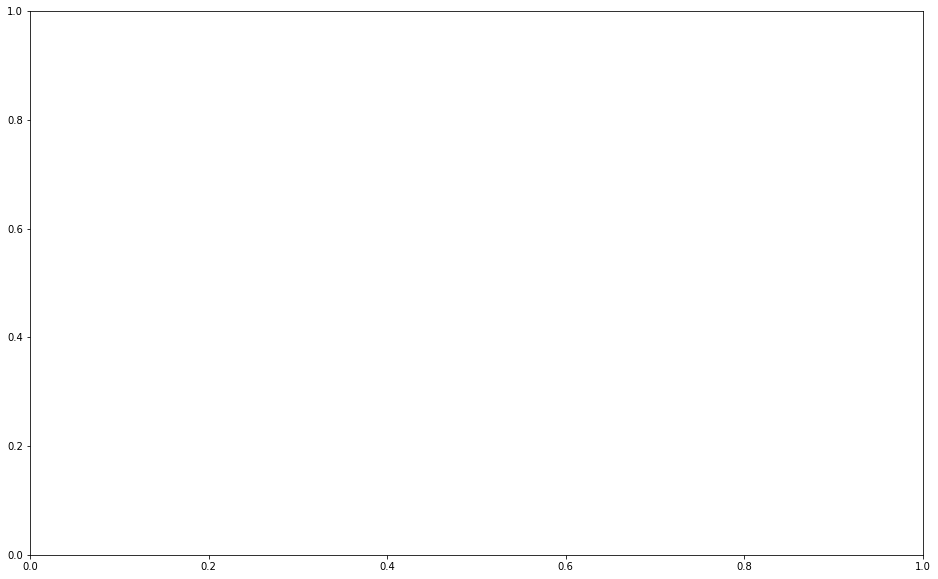

In [144]:
# attempt to get annotations in 3d pca

from mpldatacursor import datacursor

# Using a closure to access data. Ideally you'd use a "functor"-style class.
def formatter(**kwargs):
    return "10"

ax = plt.figure(figsize=(16,10)).gca(projection='3d')

ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"].apply(lambda i: 0 if i=="democracy" else 1), 
    cmap='Accent'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

# list label text with numbers and print the text underneath
for line in range(0,df.shape[0]):
    text = df.context[line]
    #text = textwrap.wrap(text, width=40)
    #text = '\n'.join(text)
    print("Tokens")
    print("%s:\t %s" % (line, text))
    p1.text(df["pca-one"][line]+0.2, df["pca-two"][line], line, horizontalalignment='left', size='small', color='black', weight='ultralight')

plt.show()

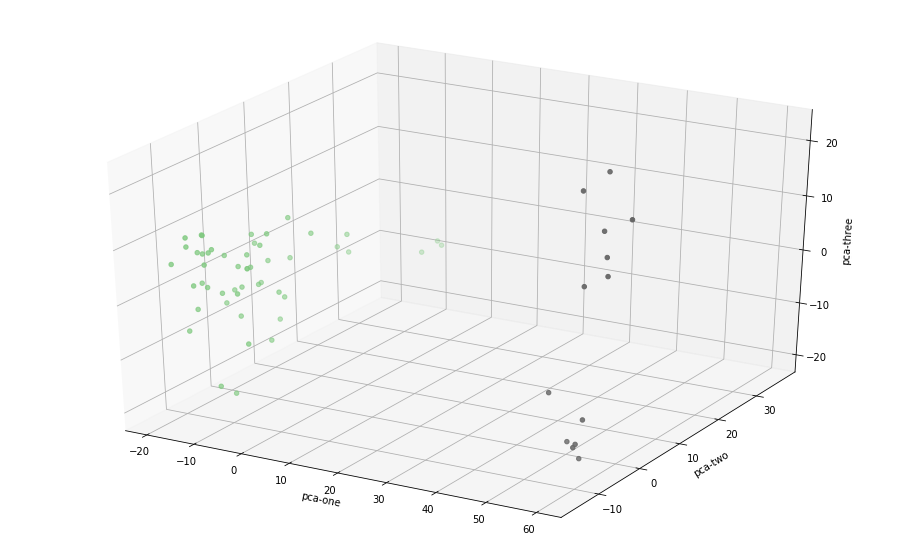

In [142]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"].apply(lambda i: 0 if i=="democracy" else 1), 
    cmap='Accent'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# TSNE 

In [134]:
data_subset = df[feat_cols].values


time_start = time.time()
# use low perplexity because N is very small
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 63 samples in 0.000s...
[t-SNE] Computed neighbors for 63 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 63 / 63
[t-SNE] Mean sigma: 14.780405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.868965
[t-SNE] KL divergence after 300 iterations: 1.395258
t-SNE done! Time elapsed: 0.12987232208251953 seconds


Tokens
0:	 Jailed since 1981 for advocating democracy
Tokens
1:	 In April 1981 he was again arrested for articles he had written in association with democracy activist Xu Wenli , tried in May 1982 and sent to prison .
Tokens
2:	 He says of the liberals that they were placed in a predicament by the fall : ‘ A democracy can not be imposed by force , the majority must favour it , yet the majority wanted what Khomeini wanted — an Islamic republic . ’
Tokens
3:	 The suggestion that democracy can not be imposed by force has the force of a generalisation .
Tokens
4:	 This is an author who has contributed to the Russia which has come after him — to the emergence there , at the present time , of the demand for a lawful Opposition , for the duality of democracy .
Tokens
5:	 In both cases , democracy is invoked .
Tokens
6:	 But it is the theory of democracy as the right of the majority to rule which is seen as central , rather than democracy as the preservation of minority rights .
Tokens
7:	 But

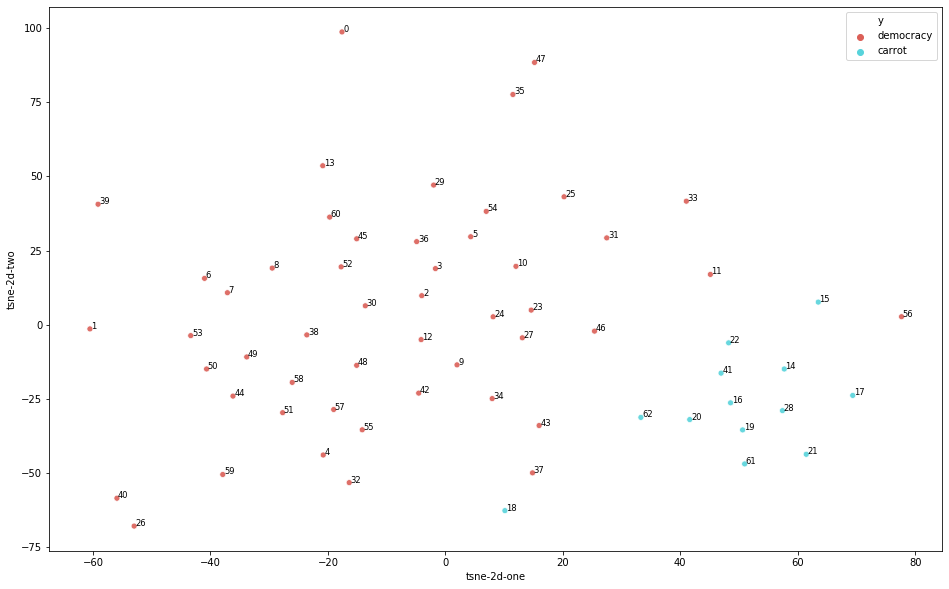

In [140]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.9
)


# annotate points with text ongraph
# for line in range(0,df.shape[0]):
#     if line % 7 == 0:
#         text = df.context[line]
#         text = textwrap.wrap(text, width=40)
#         text = '\n'.join(text)
#         p1.text(df["tsne-2d-one"][line]+0.2, df["tsne-2d-two"][line], text, horizontalalignment='left', size='small', color='black', weight='ultralight')
       
# list label text with numbers and print the text underneath
for line in range(0,df.shape[0]):
    text = df.context[line]
    #text = textwrap.wrap(text, width=40)
    #text = '\n'.join(text)
    print("Tokens")
    print("%s:\t %s" % (line, text))
    p1.text(df["tsne-2d-one"][line]+0.2, df["tsne-2d-two"][line], line, horizontalalignment='left', size='small', color='black', weight='ultralight')
